In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Cargar los datos
data = pd.read_excel('C:/Users/gonza/OneDrive/Desktop/machine learning/Telco-Customer-Churn.xlsx')

In [8]:
# Vista general de los datos
print("Dimensiones del dataset:", data.shape)
print(data.info())


Dimensiones del dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperl

In [10]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [12]:
# Estadísticas descriptivas
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


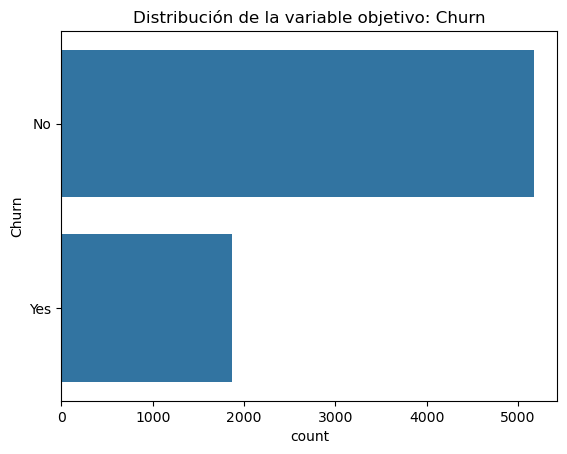

In [14]:
# Distribución de la variable objetivo
sns.countplot(data['Churn'])
plt.title('Distribución de la variable objetivo: Churn')
plt.show()

In [16]:
# Eliminar columnas irrelevantes 
data = data.drop(columns=['CustomerID'], errors='ignore')

In [20]:
# Calcular la mediana solo para columnas numéricas
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())


In [22]:
# Verificar si persisten valores nulos
print("Valores nulos después del relleno:")
print(data.isnull().sum())

Valores nulos después del relleno:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [24]:
# Codificación de variables categóricas
data = pd.get_dummies(data, drop_first=True)


In [26]:
# Escalado de características numéricas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = data.select_dtypes(include=np.number).columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

print("Datos preprocesados:")
print(data.head())

Datos preprocesados:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0            0.0  0.013889        0.115423      0.001275   
1            0.0  0.472222        0.385075      0.215867   
2            0.0  0.027778        0.354229      0.010310   
3            0.0  0.625000        0.239303      0.210241   
4            0.0  0.027778        0.521891      0.015330   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  ...  \
0                  False                  False                  False  ...   
1              

In [30]:
#División del conjunto de datos ,se separan los datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

In [32]:
# Definir características y variable objetivo
X = data.drop(columns=['Churn_Yes'])  # Ajustar el nombre según la codificación
y = data['Churn_Yes']

In [34]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Tamaños de los conjuntos:")
print("Entrenamiento:", X_train.shape, y_train.shape)
print("Prueba:", X_test.shape, y_test.shape)

Tamaños de los conjuntos:
Entrenamiento: (4930, 7072) (4930,)
Prueba: (2113, 7072) (2113,)


In [36]:
#Entrenamiento de modelos ,se utilizan tres algoritmos: Árbol de decisión, Regresión logística y Random Forest.
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [38]:
# Árbol de decisión
dt_params = {'max_depth': [3, 5, 10]}
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10]})

In [40]:
# Regresión logística
lr_params = {'C': [0.1, 1, 10]}
lr = GridSearchCV(LogisticRegression(random_state=42), lr_params, cv=5)
lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10]})

In [42]:
# Random Forest
rf_params = {'n_estimators': [50, 100, 200]}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf.fit(X_train, y_train)

print("Mejores hiperparámetros:")
print("Árbol de decisión:", dt.best_params_)
print("Regresión logística:", lr.best_params_)
print("Random Forest:", rf.best_params_)

Mejores hiperparámetros:
Árbol de decisión: {'max_depth': 5}
Regresión logística: {'C': 10}
Random Forest: {'n_estimators': 200}


In [44]:
#Evaluación de modelos, se utilizan métricas como precisión, sensibilidad y F1.
from sklearn.metrics import classification_report, accuracy_score


In [46]:
# Predicciones
dt_preds = dt.predict(X_test)
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)

In [48]:
# Evaluación
print("Árbol de decisión:")
print(classification_report(y_test, dt_preds))

print("Regresión logística:")
print(classification_report(y_test, lr_preds))

print("Random Forest:")
print(classification_report(y_test, rf_preds))

Árbol de decisión:
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1552
        True       0.62      0.52      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Regresión logística:
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1552
        True       0.66      0.55      0.60       561

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Random Forest:
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1552
        True       0.65      0.46      0.54       561

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       

In [ ]:
# concluciones 
Árbol de decisión
Precisión promedio (accuracy): 0.79
Recall (clase positiva - churn): 0.52
F1-Score (clase positiva - churn): 0.56
Observaciones:
Este modelo tiene un buen desempeño en la predicción de la clase "False" (no churn), pero un desempeño moderado en la clase "True" (churn).
El recall bajo para la clase "True" indica que el modelo no está identificando adecuadamente a los clientes que probablemente abandonen.

In [ ]:
#concluciones 
Regresión logística
Precisión promedio (accuracy): 0.81 (el mejor entre los tres modelos).
Recall (clase positiva - churn): 0.55 (mejor que el árbol de decisión y el Random Forest).
F1-Score (clase positiva - churn): 0.60 (también el mejor entre los modelos).
Observaciones:
Este modelo muestra el mejor desempeño general, con una mayor precisión y balance entre precisión y recall para ambas clases.
Aunque su recall en la clase "True" es mejor que los otros modelos, creo que aún hay margen de mejora en la detección de clientes en riesgo.

In [ ]:
#concluciones 
 Random Forest
Precisión promedio (accuracy): 0.79
Recall (clase positiva - churn): 0.46 (el más bajo).
F1-Score (clase positiva - churn): 0.54
Observaciones:
Este modelo tiene el peor desempeño en términos de recall para la clase "True".
Aunque es bueno para la clase "False", su capacidad de identificar clientes en riesgo de churn es limitada.